<a href="https://colab.research.google.com/github/findingfoot/a-scratch-pad/blob/master/playing_with_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import datasets


digits =  datasets.load_digits()
iris = datasets.load_iris()

In [31]:
from sklearn import svm

model = svm.LinearSVC()

model_svc = svm.SVC()

model.fit(digits.data[:-1], digits.target[:-1])
print(model.predict(digits.data[-1:]))

model_svc.fit(digits.data[:-1], digits.target[:-1])
print(model_svc.predict(digits.data[-1:]))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[8]
[5]


In [32]:
digits.target[-1:]

array([8])

In [33]:
# saving the model and then loading it again to use for prediction

import pickle
per_model = pickle.dumps(model_svc)
model_svc1 = pickle.loads(per_model)
model_svc1.predict(digits.data[0:1])

array([0])

In [0]:
from joblib import dump, load

Lets play with the **IRIS** datasets on our own

In [35]:
model_svc.fit(iris.data, iris.target_names[iris.target])

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [36]:
model_svc.predict(iris.data[:3])

array(['setosa', 'setosa', 'setosa'], dtype='<U10')

# sklearn has the **set_params**() ..this is used for setting the parameters of the model.

In [37]:
# Multiclass Classifier

from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer


X = [[1,3], [2,4], [4,6], [3,5], [3,6]]
y = [0,1,1,1,2]

clf = OneVsRestClassifier(estimator=SVC(gamma = 'scale',random_state = 0))
clf.fit(X,y).predict([[3,1]])

array([1])

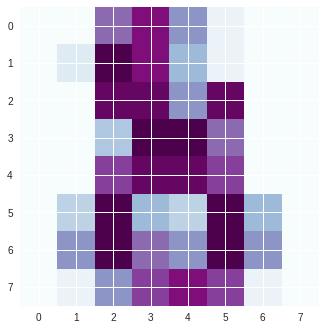

In [38]:
digits.images.shape

import matplotlib.pyplot as plt
plt.imshow(digits.images[-1],cmap='BuPu')

In [0]:
data = digits.images.reshape((digits.images.shape[0], -1))

In [40]:
data.shape

(1797, 64)

In [0]:
#lets dive into the k nearest neighbour

# split the data into train and test data set. we would need a random seed to split the data randomly.

# KNeighborClassifer
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

iris_X = iris.data
iris_y = iris.target

np.random.seed(2)

indices = np.random.permutation(len(iris_X))

In [0]:
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]

iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]


In [27]:
model = KNeighborsClassifier()
model.fit(iris_X_train, iris_y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', n_neighbors=5, p=2, weights = 'uniform')

model.predict(iris_X_test)

array([0, 2, 1, 0, 2, 1, 0, 0, 2, 0])

In [29]:
iris_y_test

array([0, 2, 1, 0, 2, 1, 0, 0, 1, 0])